Please Enter the Path for Training_Input_x2D:/ISIC2018_Task1-2_Training_Input_x2
Please Enter the Path for Training_GroundTruth_x2D:/ISIC2018_Task1_Training_GroundTruth_x2
No. of images in training folder=  2594
No. of images in test folder=  2594


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 256, 256, 16) 64          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 256, 256, 16) 0           batch_normalization_2[0][0]      
___________________________________________________________________________________________

Train on 1556 samples, validate on 519 samples
Epoch 1/50
1556/1556 [==============================] - 20s 13ms/step - loss: 0.5049 - accuracy: 0.7362 - dice_coeff: 0.4957 - val_loss: 0.7938 - val_accuracy: 0.3443 - val_dice_coeff: 0.2059

Epoch 00001: val_loss improved from inf to 0.79381, saving model to model-ISIC.h5
Epoch 2/50
1556/1556 [==============================] - 13s 8ms/step - loss: 0.3877 - accuracy: 0.8868 - dice_coeff: 0.6125 - val_loss: 0.4169 - val_accuracy: 0.8661 - val_dice_coeff: 0.5810

Epoch 00002: val_loss improved from 0.79381 to 0.41690, saving model to model-ISIC.h5
Epoch 3/50
1556/1556 [==============================] - 13s 8ms/step - loss: 0.3159 - accuracy: 0.9098 - dice_coeff: 0.6844 - val_loss: 0.3376 - val_accuracy: 0.8865 - val_dice_coeff: 0.6619

Epoch 00003: val_loss improved from 0.41690 to 0.33757, saving model to model-ISIC.h5
Epoch 4/50
1556/1556 [==============================] - 13s 8ms/step - loss: 0.2586 - accuracy: 0.9155 - dice_coeff: 0.741

1556/1556 [==============================] - 14s 9ms/step - loss: 0.0857 - accuracy: 0.9526 - dice_coeff: 0.9145 - val_loss: 0.0961 - val_accuracy: 0.9442 - val_dice_coeff: 0.9041

Epoch 00031: val_loss did not improve from 0.09470
Epoch 32/50
1556/1556 [==============================] - 14s 9ms/step - loss: 0.0843 - accuracy: 0.9536 - dice_coeff: 0.9155 - val_loss: 0.0949 - val_accuracy: 0.9453 - val_dice_coeff: 0.9051

Epoch 00032: val_loss did not improve from 0.09470
Epoch 33/50
1556/1556 [==============================] - 13s 9ms/step - loss: 0.0846 - accuracy: 0.9532 - dice_coeff: 0.9154 - val_loss: 0.0961 - val_accuracy: 0.9443 - val_dice_coeff: 0.9040

Epoch 00033: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00033: val_loss did not improve from 0.09470
Epoch 34/50
1556/1556 [==============================] - 13s 9ms/step - loss: 0.0824 - accuracy: 0.9546 - dice_coeff: 0.9177 - val_loss: 0.0953 - val_accuracy: 0.9448 - val_dice_coeff: 0.9048

Epoch

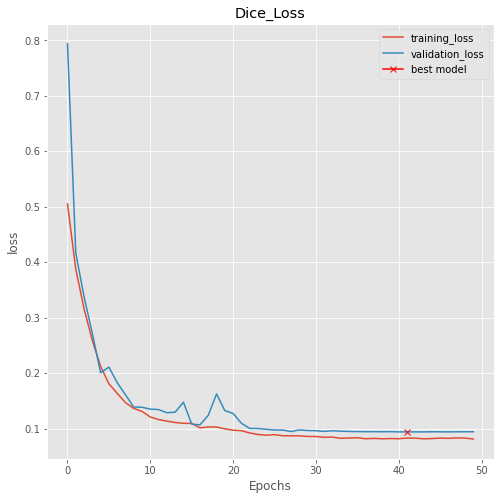

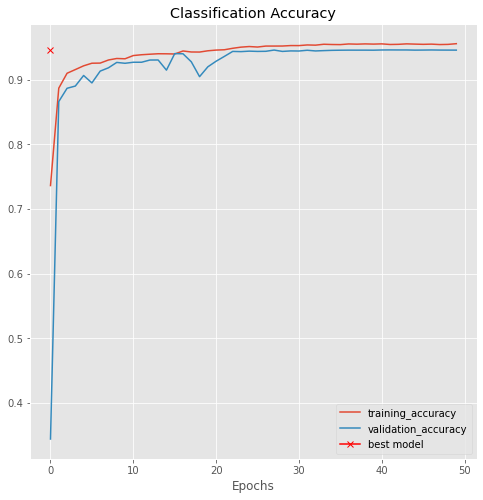

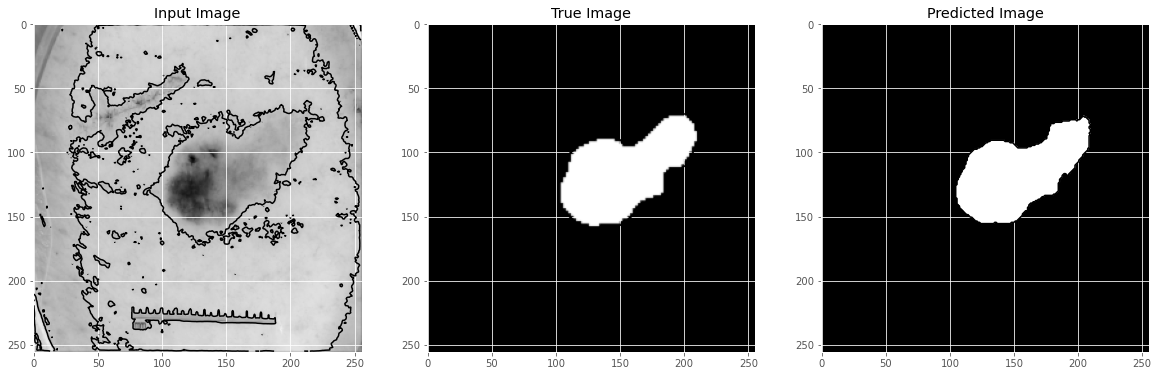

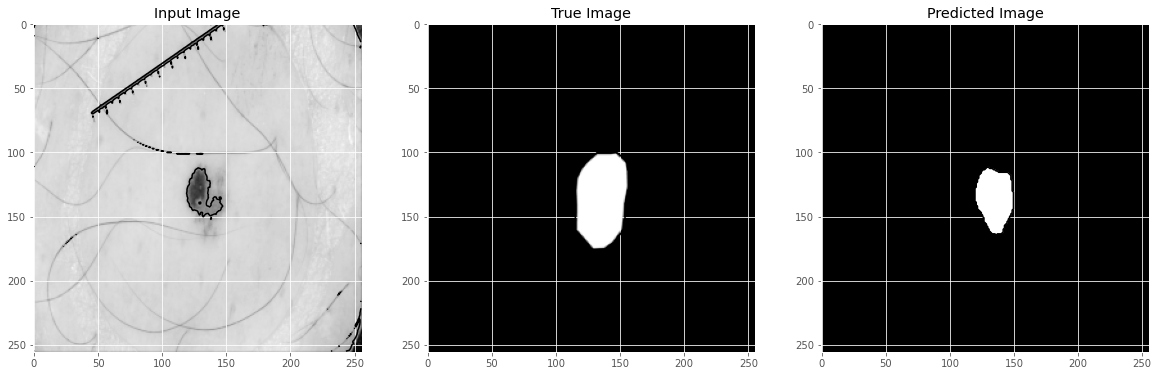

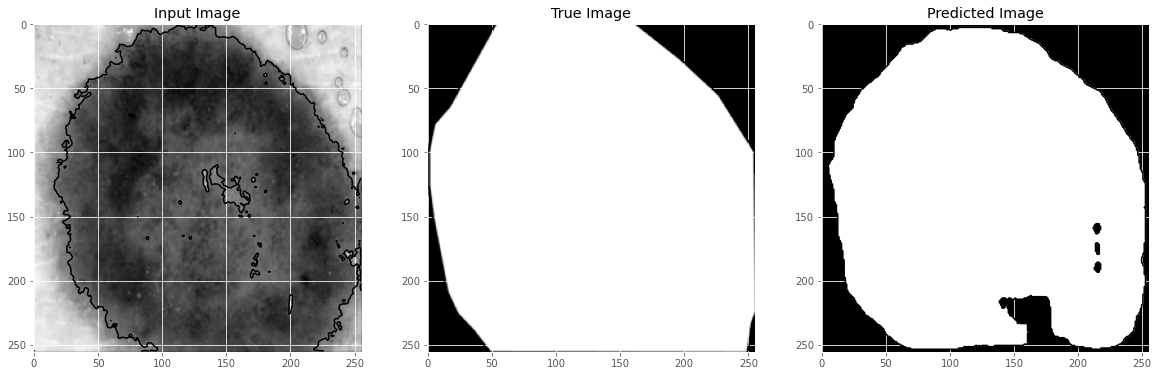

In [4]:
# Libraries used for this Project
import os # used for interaction with the operating system 
import random # used for picking up random varaibales
import pandas as pd # used for structuring the data in dataframe
import numpy as np # used for preprocessing the data in an matrix or array format
import matplotlib.pyplot as plt # used for ploting the images and graphs
plt.style.use("ggplot") # used to plot in ggplot style
%matplotlib inline
from tqdm import tqdm_notebook, tnrange # used for printing the status bar
from itertools import chain # used for iteration 
from skimage.io import imread, imshow, concatenate_images # Scikit learn package for reading, showing and concatinating image size
from skimage.transform import resize # Scikit learn package for resizing the image dimensions
from skimage.morphology import label
from sklearn.model_selection import train_test_split # Scikit learn package used for test train split
import tensorflow as tf # used for training inference of deep learning architecture
from keras.models import Model, load_model # Keras package used for defining the model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout # Keras package used for construsting the input, Batch Norm
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose # Keras package used for defining the Convolution2D layers
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D # Keras package used for defining the MaxPool
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau # Keras package used for defining the calback for early stop
from keras.optimizers import Adam # Keras package used for defining the model optimizer as ADAM
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical

%run Final_Project.ipynb


img_width = 256 # Defining the width of image
img_height =256 # Defining the Height of image
border = 5 # Defining the boder size

# Input from the User to prove the Folder Path of the ISICs Data Set
path_train = input("Please Enter the Path for Training_Input_x2")
path_seg = input("Please Enter the Path for Training_GroundTruth_x2")


def main():
    isic_train, isic_seg_train = path_for_dataset(path_train,path_seg)
    isic_train_sort,isic_seg_train_sort = sorted_test(isic_train, isic_seg_train)
    X_ISIC_train = Load_img(path_train+"/",isic_train_sort)
    Y_ISIC_train = Load_segmentation(path_seg+"/",isic_seg_train_sort)
    X_train, X_test, y_train, y_test, X_val, y_val = load_dataset(X_ISIC_train, Y_ISIC_train)
    Y_ISIC_train_cat, Y_ISIC_test_cat, Y_ISIC_val_cat = pre_processing(y_train,y_test,y_val)
    input_img = Input((img_height, img_width, 1), name='img') # used for assigning the input image with the dimensions specified above
    model = generat_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True) # calls the U-Net architecture for the specifid dataset
    model.compile(optimizer=Adam(), loss=dice_loss, metrics=["accuracy",dice_coeff]) # compiling the model using the dice_loss
    model.summary()
    callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-ISIC.h5', verbose=1, save_best_only=True, save_weights_only=True)]
    results = model.fit(X_train, Y_ISIC_train_cat, batch_size=32, epochs=50, callbacks=callbacks,
                    validation_data=(X_val, Y_ISIC_val_cat))
    test_preds_reshape = best_model(model,X_test,y_test)
    loss_plot(results)
    acc_plot(results)
    #test_preds_reshape = best_model(X_test)
    plot_ISIc(X_test,y_test,test_preds_reshape)
    plot_ISIc(X_test,y_test,test_preds_reshape)
    plot_ISIc(X_test,y_test,test_preds_reshape)

if __name__ == "__main__":    
    main()    
